<a href="https://colab.research.google.com/github/KevKil/KevKil-SupLearn_ML_Wk4/blob/main/Kevin_Kilonzo_IPWK4_K_Nearest_Neighbours_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Predict whether a voyager survived or not using dependent variables provided by the dataset

### b) Defining the Metric for Success

To be able to predict if a passenger survived or not with at least 80% accuracy

### c) Understanding the context 

The train dataset gives information about the survival of the passenger and the features which are important in determining if the voyager survived or not

### d) Recording the Experimental Design



1.   Defining the Question
2.   Reading the data
3.   Checking the data
4.   External data source validation
5.   Tidying the dataset
6.   Exploratory data analysis
7.   Implimenting the solution
8.   Challenging the solution
9.   Follow up questions



### e) Data Relevance

The above dataset consists of a list of 891 passengers who were onboard on the Titanic. The above dataset consists of 891 rows and 12 columns. The 12 columns gives the following details about the passengers -

* Passenger Id
* Survived - This column gives information whether the concerned passenger had survived the tragedy or not.
 - 1 ---> The passenger survived
 - 0 ---> The passenger did not survive

* pclass - Passenger Ticket class : Class 1, 2 and 3.
* Name - Name of the passenger
* sex - Sex of the Passenger
* Age - Age in years of the Passenger
* sibsp - Number of siblings / spouses aboard the Titanic
* parch - Number of parents / children aboard the Titanic
* Ticket - Ticket number
* Fare - Passenger fare
* Cabin - Cabin number
* Embarked - Port of Embarkation shows the port from which the passenger boarded the titanic
   - C - Cherbourg
       Q - Queenstown
       S - Southampton

## 2. Reading the Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the Data from the source i.e. csv
test = pd.read_csv('/content/test (1).csv')
train = pd.read_csv('/content/train (5).csv')



## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


In [ ]:
# Previewing the top of our dataset
#
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the bottom of our dataset
# 
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Previewing the bottom of our dataset
# 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Checking whether each column has an appropriate datatype
#
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Checking whether each column has an appropriate datatype
#
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. External Data Source Validation

Use the given links to compare the data against the original to ensure the data is similar and the entries are the same
* [train dataset](https://archive.org/download/train5_202002/train%20%285%29.csv)
* [test dataset](https://archive.org/download/test1_202002/test%20%281%29.csv)

### a.Validation

## 5. Tidying the Dataset

Will clean and tidy the train dataset as it will be used by the models for training

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Convert the column names to lower case for ease of use
# df_final.columns = df_final.columns.str.replace(" ", "_").str.lower()
train.columns = train.columns.str.lower()
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
# Choosing colummns for modeling
# Dropped passenger id ,name and ticket since they are unique to each passenger
selected=['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked']
train = train[selected]

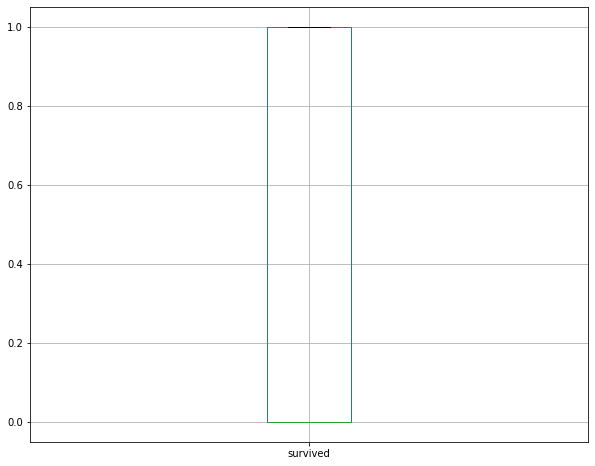

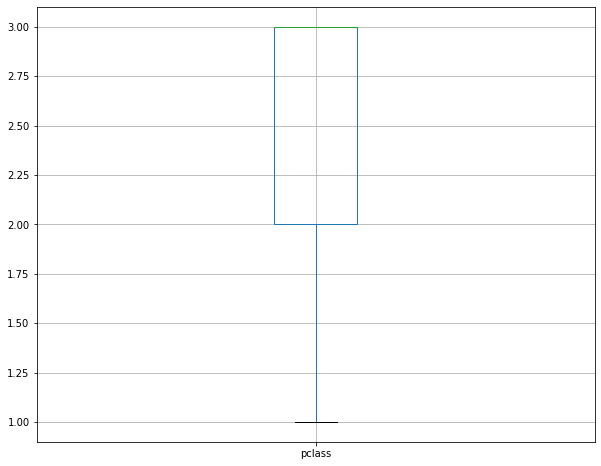

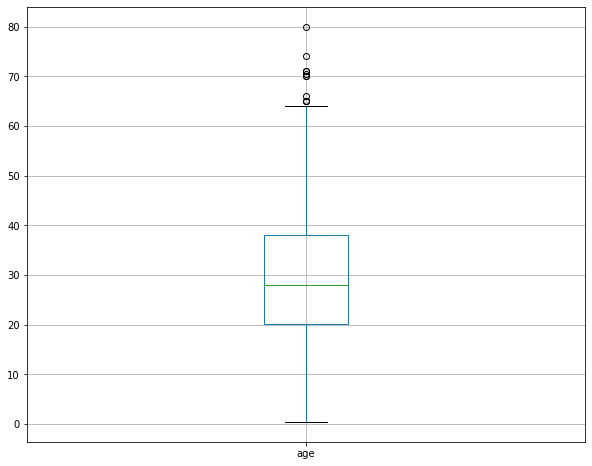

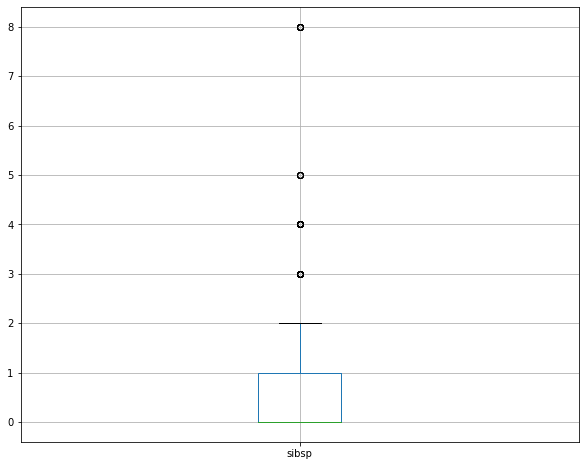

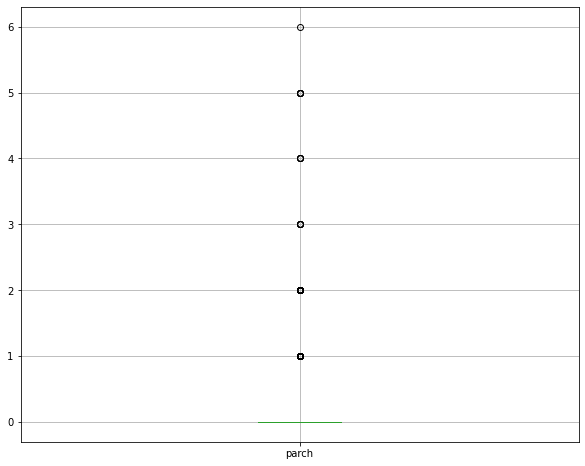

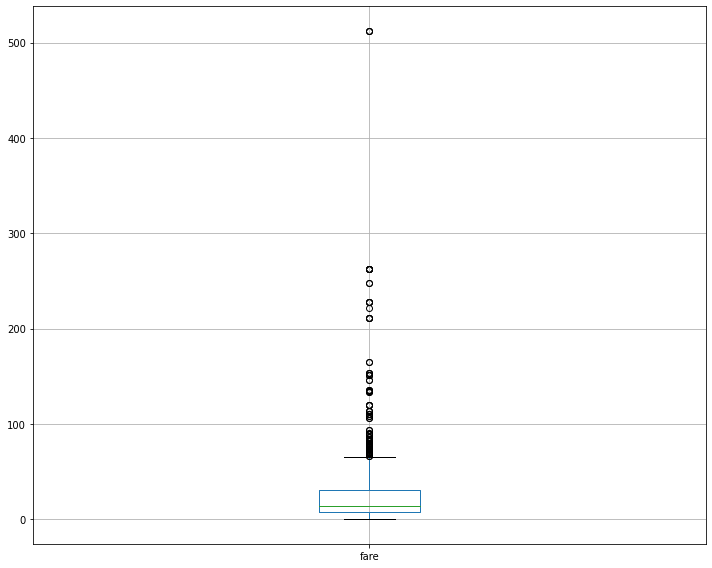

In [ ]:
# Checking for Outliers
#
#Creating subplot of each column with its own scale
num_cols = train.select_dtypes('number').columns

for col in num_cols:
  plt.figure(figsize = (10, 8))
  train.boxplot([col])
    
plt.tight_layout()


Detected outliers are within the expected values so the model will use all values

In [ ]:
# Checking for Anomalies
# 
for i in train.columns:
  print('\n')
  print(train[i].unique())



[0 1]


[3 1 2]


['male' 'female']


[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


[1 0 3 4 2 5 8]


[0 1 2 5 3 4 6]


[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.

No  observed anomalies, the data is as expected

In [ ]:
# Identifying the Missing Data
#
train.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
cabin       687
embarked      2
dtype: int64

- Cabin column has majority missing values so the column will be dropped
- embarked column will be filled with the mode
- age will be filled by mean age of the selected passenger class

In [ ]:
# Dealing with the Missing Data


train = train.drop(columns='cabin')
train['embarked']= train['embarked'].fillna(train['embarked'].mode()[0])


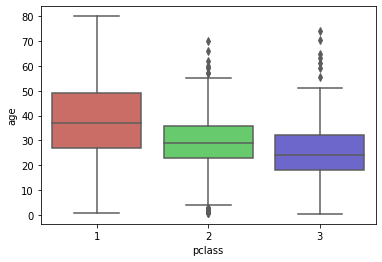

In [ ]:
# Imputing missing values
# ---
#look at how passenger age is related to their class as a passenger on the boat.
# 
sns.boxplot(x='pclass', y='age', data=train, palette='hls')

Passsenger age is roughly determined by the passenger class thus we will fill the missing values with the average age according to the pclass 

In [ ]:
# Created function to fill null values in age column with the average age of the passenger class
def age_approx(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [ ]:
# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
train['age'] = train[['age', 'pclass']].apply(age_approx, axis=1)


In [ ]:
# Check if changes have been implimented
train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [ ]:
# Checking for duplicates
train.duplicated().sum()

116

Ignore the duplicated values as they may have significance to the dataset

## 6. Exploratory Analysis

In [ ]:
# Ploting the bivariate summaries and recording our observations
#
train.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,29.066409,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.244532,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,37.000000,1.000000,0.000000,31.000000,NaN


No unexpected values
- More males than females
- Southhampton is the port with the most embarkments

### a) Univariate

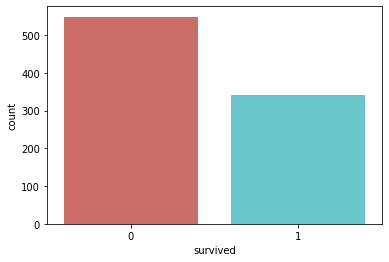

In [ ]:
# Plotting a countplot of survived passengers
sns.countplot(x='survived',data=train, palette='hls')

Most of the passengers did not survive

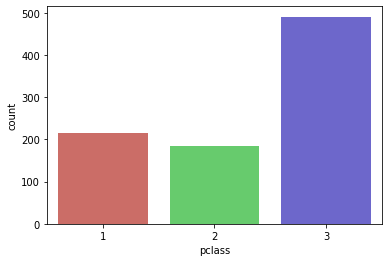

In [ ]:
# Plotting a countplot of survived passengers
sns.countplot(x='pclass',data=train, palette='hls')

Most of the passengers belonged to the third class with second class having the least passengers

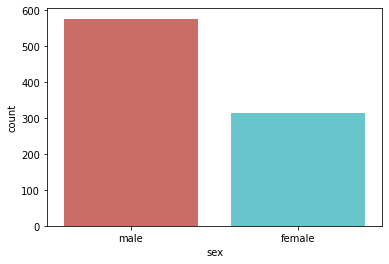

In [ ]:
# Plotting a countplot of survived passengers
sns.countplot(x='sex',data=train, palette='hls')

Most of the passengers were male

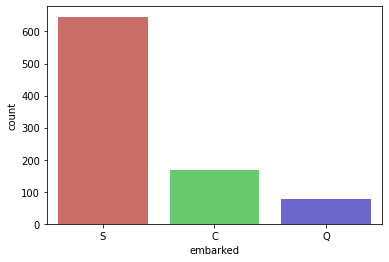

In [ ]:
# Plotting a countplot of survived passengers
sns.countplot(x='embarked',data=train, palette='hls')

Most of the passengers embarked in Southhampton with Queenstown having had the least embarkments

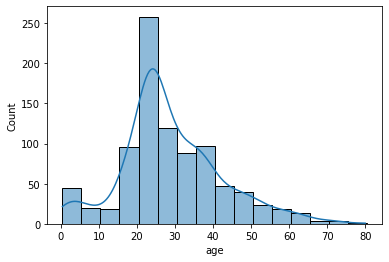

In [ ]:
# Histogram showing the distribution of ages of the passengers
sns.histplot(data= train, x='age',binwidth=5, kde= True, palette='hls')

Most of the passengers are between the ages of 21 and 26

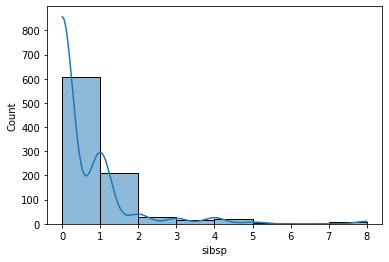

In [ ]:
# Histogram showing the distribution of siblings+spouses of the passengers
sns.histplot(data= train, x='sibsp',binwidth=1, kde= True, palette='hls')

Most of the passengers travelled alone without a spouse or a sibling

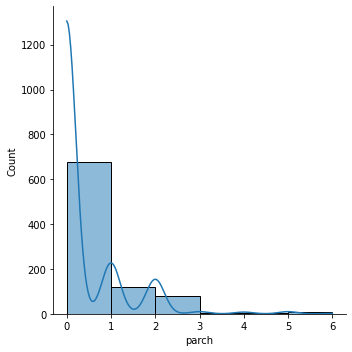

In [ ]:
# Distribution plot showing the distribution of parent+child of the passengers
sns.displot(data= train, x='parch',binwidth=1, kde= True, palette='hls')

Most of the passengers travelled alone without either parent or child

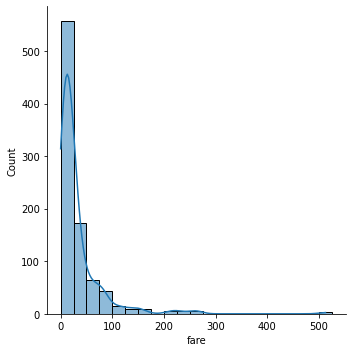

In [ ]:
# Distribution plot showing the distribution of parent+child of the passengers
sns.displot(data= train, x='fare',binwidth=25, kde= True, palette='hls')

Most of the passengers paid between 0 and 25 units of currency for the voyage

### b) Bivariate

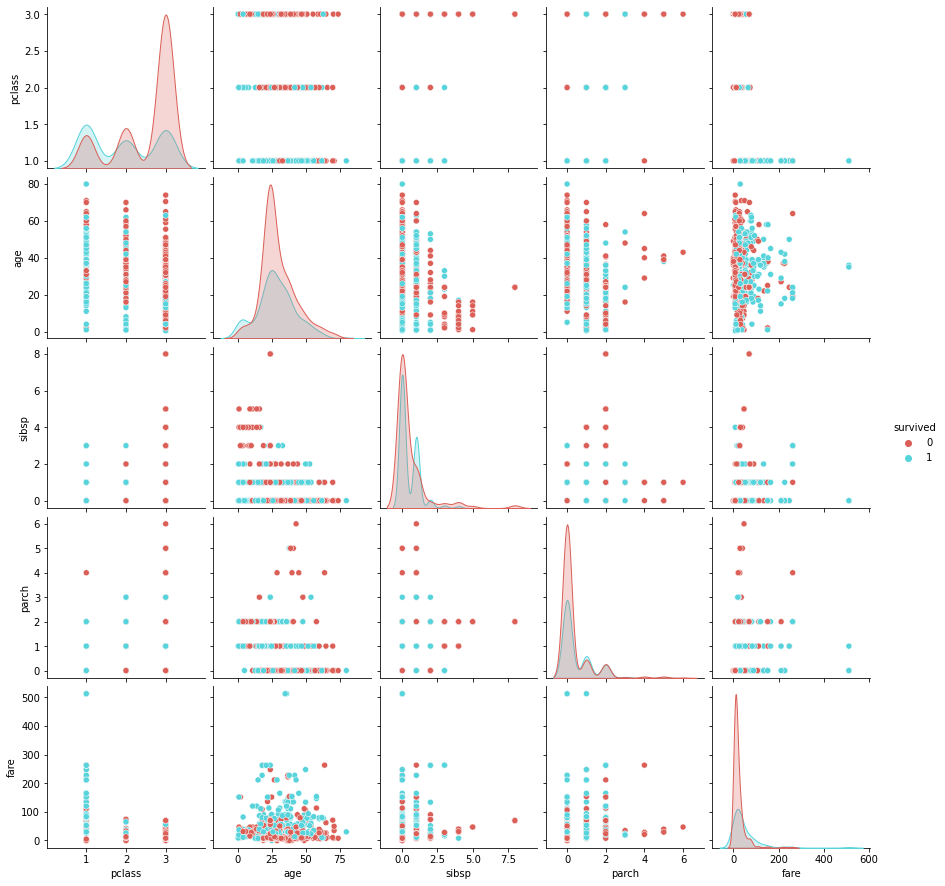

In [ ]:
# Pairplots with distinction by survived
sns.pairplot(train, hue='survived', palette='hls')

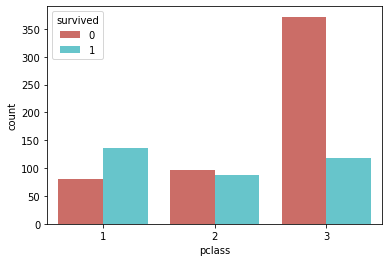

In [ ]:
# Plotting survived by class
sns.countplot(x='pclass',hue='survived',data=train, palette='hls')

- Highest percentage of survivors came from the first class
- Most of the passengers in the third class did not survive

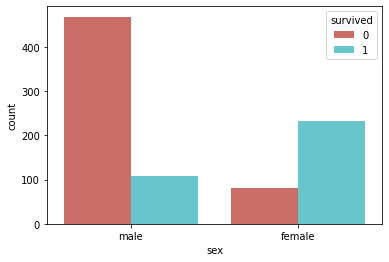

In [ ]:
# Plotting survived by sex
sns.countplot(x='sex',hue='survived',data=train, palette='hls')

- Most of the male passengers did not survive
- Most of the female passengers survived

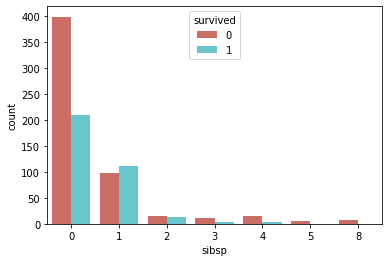

In [ ]:
# Plotting survived by sex
sns.countplot(x='sibsp',hue='survived',data=train, palette='hls')

- If the passenger had a sibling or spouse the were more likely to survive

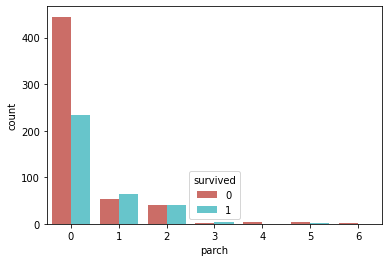

In [ ]:
# Plotting survived by sex
sns.countplot(x='parch',hue='survived',data=train, palette='hls')

If the passenger had a child or had a parent they were more likely to survive

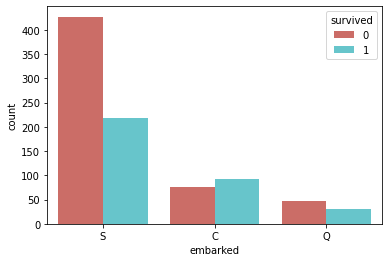

In [ ]:
# Plotting survived by sex
sns.countplot(x='embarked',hue='survived',data=train, palette='hls')

Passengers from Cherbourgh were more likely to survive

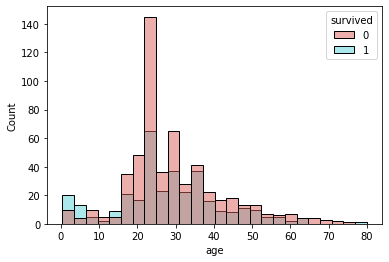

In [ ]:
# Distribution plot of age with survival comparison
sns.histplot(train, x="age", hue="survived", legend=True, palette='hls',)


Children below 6 years were more likely to survive compared to other ages

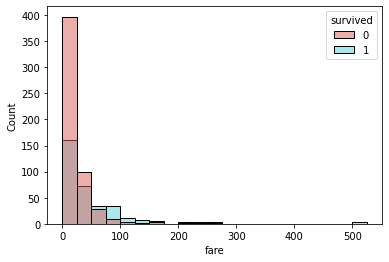

In [ ]:
# Distribution plot of fare with survival comparison
sns.histplot(train, x="fare", hue="survived",binwidth=25, legend=True, palette='hls',)


The more fare the passenger paid the more they were likely to survive

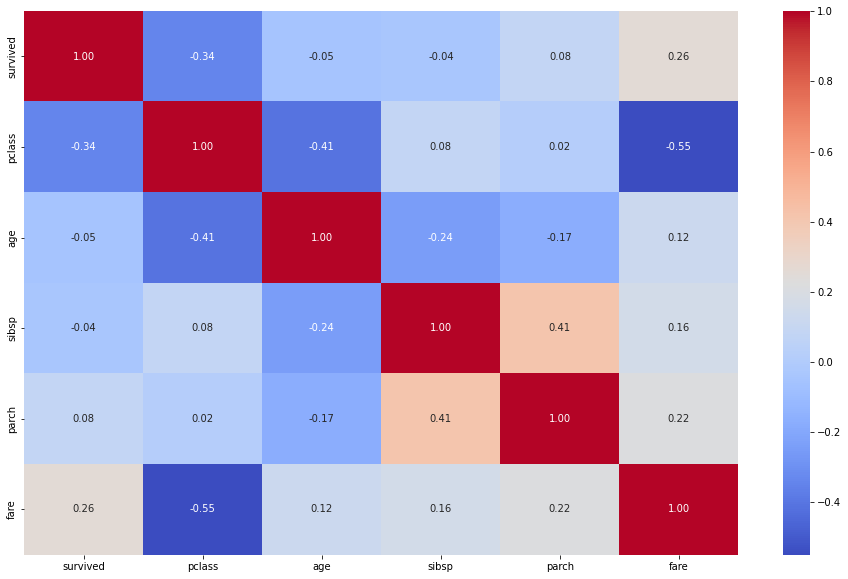

In [ ]:
# Creating a correlation heat map for the columns
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),annot=True,cmap="coolwarm",fmt=".2f");
plt.show()

- Passenger class is negatively correlated with age and fare
- Age is negatively correlated with passenger class
- Siblings/spouses is positively correlated with parent/child
- Fare is negatively correlated with passenger class 

## 7. Implementing the Solution

### a)Feature processing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
# Converting sex column to dummy variable
sex = pd.get_dummies(train.sex ,drop_first=True)
sex.head(2)

,male
0,1
1,0


In [ ]:
# Converting embarked column to dummy variable
embarked = pd.get_dummies(train.embarked ,drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
# Merge the dummies dataframe to the dataset
data = pd.concat([train,sex,embarked], axis=1)
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0


In [ ]:
# Dropping the categorical column
data = data.drop(['sex','embarked'],axis=1)
data.head(3)

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [ ]:
# Selecting features and labels
X = data.drop('survived',axis=1)
y= data.survived

### b) Using KNN classifier

#### i)80:20 test train split

In [ ]:
# Train Test Split
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Feature Scaling
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Implementing the Solution
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 18]
 [12 53]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       114
           1       0.75      0.82      0.78        65

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



In [ ]:
# Getting the accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8324022346368715

At k=5 and 80:20 train-test split the accuracy is 83.24%

---



**Cross validation**

In [ ]:
# Performing cross validation with 5 folds
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [ ]:
# Getting the error rate
1-accuracy


array([0.18181818, 0.1958042 , 0.16197183, 0.21830986, 0.19014085])

In [ ]:
# Getting the mean error rate
error_rate=round((1-accuracy).mean(),4)
error_rate

0.1896

#### ii) 70:30 test train split

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Implementing the Solution
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
# 
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[147  21]
 [ 27  73]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       168
           1       0.78      0.73      0.75       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [ ]:
# Getting the accuracy
metrics.accuracy_score(y_test,y_pred)

0.8208955223880597

At k=5 and 70:30 train-test split the accuracy is 82.09%

---



#### iii) 60:40 split

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Implementing the Solution
# 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
# 
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[189  32]
 [ 43  93]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       221
           1       0.74      0.68      0.71       136

    accuracy                           0.79       357
   macro avg       0.78      0.77      0.77       357
weighted avg       0.79      0.79      0.79       357



In [ ]:
# Getting the accuracy
metrics.accuracy_score(y_test,y_pred)

0.7899159663865546

At k=5 and 60:40 train-test split the accuracy is 78.99%

---



* The best accuracy comes with test train split of 80:20
* Can fine tune to determine the best value for k at 80:20 split
* Do cross validation to confirm the accuracy is within range of the folds

---



We can improve performance of KNN classifier by
1. Scaling the data because KNN uses distance to classify the data
2. Tuning k value using hyperparameter tuning
3. Selecting the best algorithm to compute K nearest neighbours according to the dataset
4. Determining weights of the K nearest neighbours and choosing the best weighting method using hyperparameter tuning
5. Dimension reduction to reduce the number of features

## 8. Challenging the solution

Minimum error:- 0.15083798882681565 at K = 4


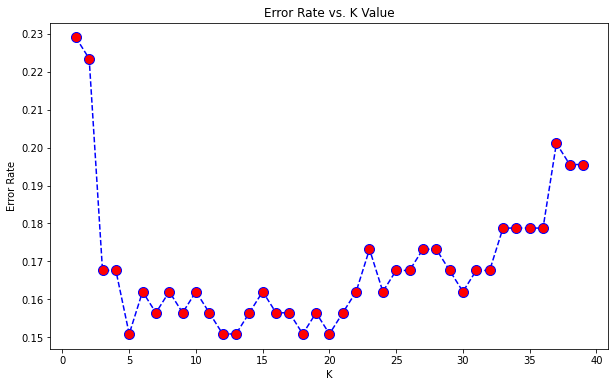

In [ ]:
# Reviewing the Solution 
# Finding the optimal k value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8491620111731844 at K = 4


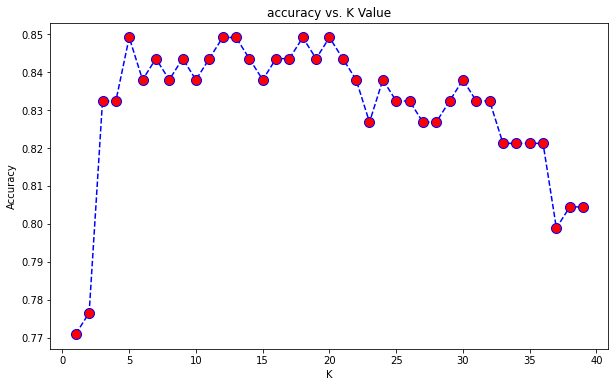

In [ ]:
# Reviewing the Solution 
# Finding the optimal accuracy
acc = []

from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Lowest error rate and highest accuracy is when k=5 at 80:20 test train split 

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

The data was accurate and it was the right data

### b). Do we need other data to answer our question?

More data can be accuired to improve the accuracy but the achieved accuracy is better than the intended accuracy of 80%

### c). Did we have the right question?

The question to predict the survival was good and could be predicted using the given dataset